Listing directories in base path: "C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB"
Available directories: ['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash (Blade Forme)', 'Aegislash (Shield Forme)', 'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alcremie', 'Alolan Diglett', 'Alolan Dugtrio', 'Alolan Exeggutor', 'Alolan Geodude', 'Alolan Golem', 'Alolan Graveler', 'Alolan Grimer', 'Alolan Marowak', 'Alolan Meowth', 'Alolan Muk', 'Alolan Ninetales', 'Alolan Persian', 'Alolan Raichu', 'Alolan Raticate', 'Alolan Rattata', 'Alolan Sandshrew', 'Alolan Sandslash', 'Alolan Vulpix', 'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Annihilape', 'Anorith', 'Appletun', 'Applin', 'Araquanid', 'Arbok', 'Arboliva', 'Arcanine', 'Arceus', 'Archaludon', 'Archen', 'Archeops', 'Arctibax', 'Arctovish', 'Arctozolt', 'Ariados', 'Armaldo', 'Armarouge', 'Aromatisse', 'Aron', 'Arrokuda', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill

,Pokemon,Type,Species,Height,Weight,Abilities,EV Yield,Catch Rate,Base Friendship,Base Exp,...,Defense Max,Special Attack Base,Special Attack Min,Special Attack Max,Special Defense Base,Special Defense Min,Special Defense Max,Speed Base,Speed Min,Speed Max
242,Dialga,"Steel, Dragon",Temporal Pokémon,5.4 m (17′09″),683.0 kg (1505.8 lbs),"1. Pressure, Telepathy (hidden ability)",3 Sp. Atk,"3 (0.4% with PokéBall, full HP)",0 (lower than normal),340,...,372,150,274,438,100,184,328,90,166,306


Looking for images in directory: "C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB\Dialga"
Found images: ['C:\\Users\\AGIF\\Documents\\VSC\\Alp_comvis\\Pokemon Images DB\\Pokemon Images DB\\Dialga\\Dialga.png', 'C:\\Users\\AGIF\\Documents\\VSC\\Alp_comvis\\Pokemon Images DB\\Pokemon Images DB\\Dialga\\Dialga_new.png']


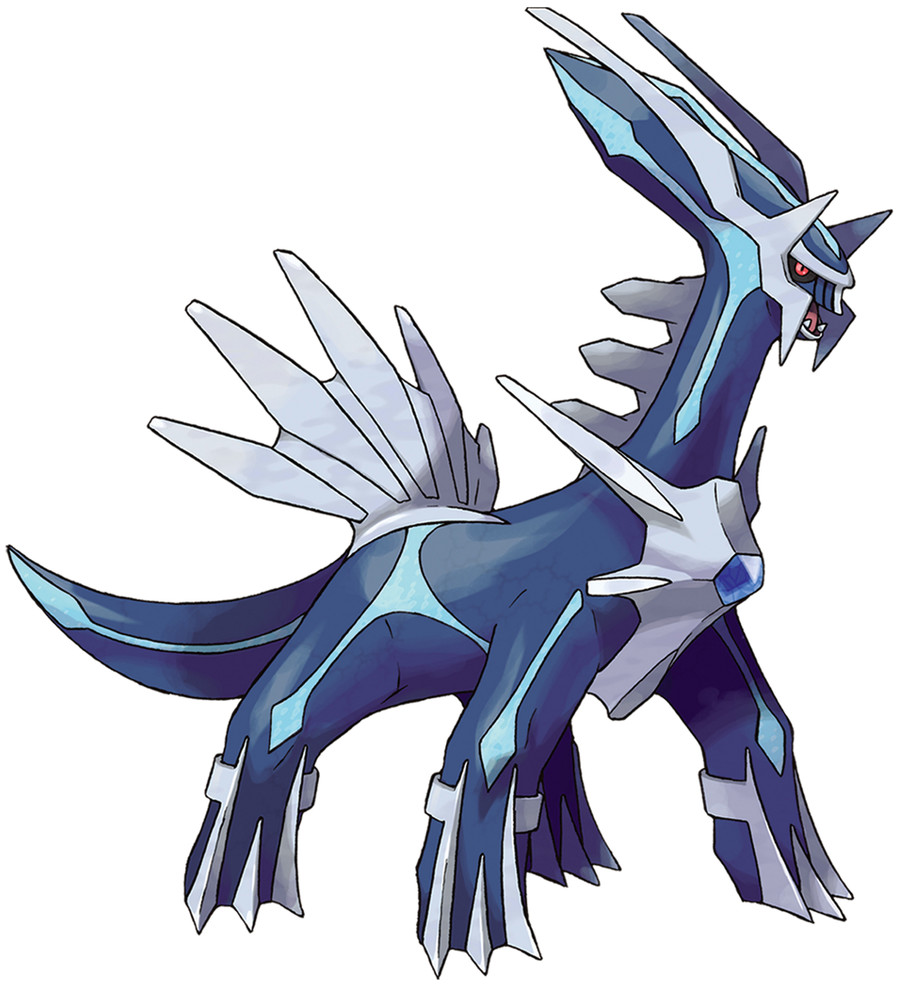

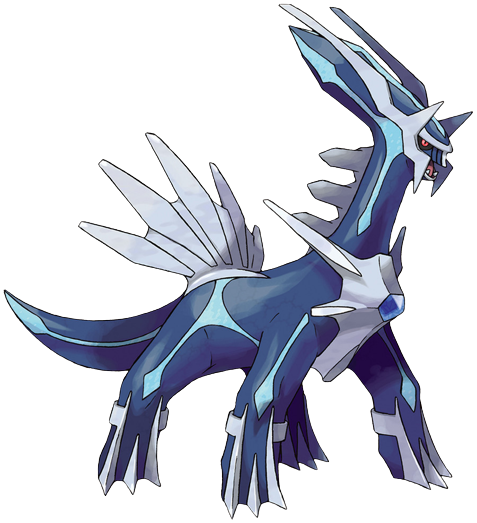

In [29]:
import pandas as pd
import os
from IPython.display import display, Image as IPImage

# Load the CSV file
csv_file_path = 'pokemonDB_dataset.csv'
pokemon_data = pd.read_csv(csv_file_path)

# Normalize and clean text data for consistency
pokemon_data['Pokemon'] = pokemon_data['Pokemon'].str.strip()

# Function to get image paths
def get_image_paths(pokemon_name, base_dir):
    pokemon_dir = os.path.join(base_dir, pokemon_name)
    print(f"Looking for images in directory: \"{pokemon_dir}\"")
    
    if os.path.isdir(pokemon_dir):
        image_files = [os.path.join(pokemon_dir, f) for f in os.listdir(pokemon_dir) if f.endswith(('.png', '.gif'))]
        print(f"Found images: {image_files}")
        return image_files
    else:
        print(f"Directory not found: \"{pokemon_dir}\"")
        return []

# Function to display Pokémon data and images
def display_pokemon_info(pokemon_name, data, image_base_dir):
    pokemon_info = data.loc[data['Pokemon'] == pokemon_name]
    
    if not pokemon_info.empty:
        # Display Pokémon data
        display(pokemon_info)
        
        # Get and display images
        image_paths = get_image_paths(pokemon_name, image_base_dir)
        for img_path in image_paths:
            display(IPImage(filename=img_path))
    else:
        print(f"Pokémon '{pokemon_name}' not found in the dataset.")

# Base directory path for images
image_base_dir = r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB"

# List available directories in the base path
print(f"Listing directories in base path: \"{image_base_dir}\"")
available_directories = os.listdir(image_base_dir)
print(f"Available directories: {available_directories}")

# Example usage
display_pokemon_info('Dialga', pokemon_data, image_base_dir)


Columns in CSV: Index(['Pokemon', 'Type', 'Species', 'Height', 'Weight', 'Abilities',
       'EV Yield', 'Catch Rate', 'Base Friendship', 'Base Exp', 'Growth Rate',
       'Egg Groups', 'Gender', 'Egg Cycles', 'HP Base', 'HP Min', 'HP Max',
       'Attack Base', 'Attack Min', 'Attack Max', 'Defense Base',
       'Defense Min', 'Defense Max', 'Special Attack Base',
       'Special Attack Min', 'Special Attack Max', 'Special Defense Base',
       'Special Defense Min', 'Special Defense Max', 'Speed Base', 'Speed Min',
       'Speed Max'],
      dtype='object')
Processing user input image at C:\Users\AGIF\Downloads\Week13\Pikachu_SSB4.png


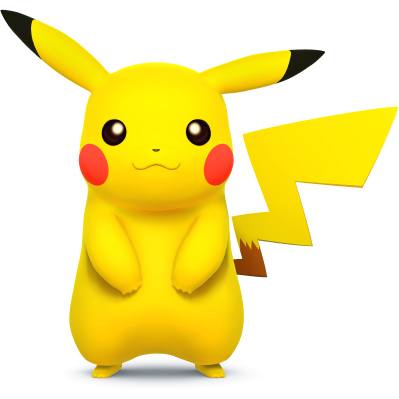

Classifying image: "C:\Users\AGIF\Downloads\Week13\Pikachu_SSB4.png"
1/1 [==============================] - 0s 188ms/step


KeyError: 'n03944341'

In [30]:
import pandas as pd
import os
import json
from IPython.display import display, Image as IPImage
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(csv_file_path, base_dir):
    # Load the CSV file
    data = pd.read_csv(csv_file_path)
    
    # Display the columns to identify the correct image path column
    print("Columns in CSV:", data.columns)
    
    # Normalize and clean text data for consistency
    data['Pokemon'] = data['Pokemon'].str.strip()
    
    # Dynamically find the image path column (assuming it's the second column here for demonstration)
    image_path_column = data.columns[1]  # Adjust if necessary based on inspection output
    
    data[image_path_column] = data[image_path_column].str.strip()
    
    # Update image paths to include the base directory
    data[image_path_column] = data[image_path_column].apply(lambda x: os.path.join(base_dir, x))
    
    # Ensure all image paths are valid
    data = data[data[image_path_column].apply(os.path.exists)]
    
    return data, image_path_column

# Function to preprocess image before classification
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Function to perform image classification
def classify_image(image_path, model, custom_class_index):
    print(f"Classifying image: \"{image_path}\"")
    
    # Preprocess the image
    img_array = preprocess_image(image_path)
    
    # Perform classification
    preds = model.predict(img_array.reshape(1, 224, 224, 3))
    
    # Decode predictions
    decoded_preds = decode_predictions(preds, top=3)[0]
    
    # Convert decoded predictions to custom class names
    custom_decoded_preds = [(custom_class_index[str(pred[0])], pred[1]) for pred in decoded_preds]
    
    return custom_decoded_preds

# Function to process user input image
def process_user_image(image_path, model, custom_class_index):
    if os.path.exists(image_path):
        print(f"Processing user input image at {image_path}")
        display(IPImage(filename=image_path))
        predictions = classify_image(image_path, model, custom_class_index)
        print("Predictions:")
        for pred in predictions:
            print(f"- {pred[0]}: {pred[1]:.2f}")
    else:
        print(f"Image not found: \"{image_path}\"")

# Function to prompt user input
def user_input_image(model, custom_class_index):
    image_path = input("Enter the path to the Pokémon image: ").strip()
    process_user_image(image_path, model, custom_class_index)

# Main execution
if __name__ == "__main__":
    # Load and preprocess the dataset
    csv_file_path = 'pokemonDB_dataset.csv'
    # Base directory path for images
    image_base_dir = r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB"
    # Print columns to identify correct column name
    pokemon_data, image_path_column = load_and_preprocess_dataset(csv_file_path, image_base_dir)
    
    # Load VGG16 model
    vgg_model = VGG16(weights='imagenet')
    
    # Load custom class index
    custom_class_index_path = 'pokemonDB_dataset.json'
    with open(custom_class_index_path, 'r') as f:
        custom_class_index = json.load(f)
    
    # Prompt user input
    user_input_image(vgg_model, custom_class_index)
